In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

> 在使用 **`seaborn`** 设置全局的环境的时候，老版本的时候是使用 **`set_context`** 方法，但是我使用的时候却不起作用，但是我使用 **`set`** 方法能起到作用。

In [19]:
colors=sns.color_palette("deep")
# sns.set_palette('deep', desat=.6)
sns.set(rc={"figure.figsize":(18,5)})
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)
sns.set?

* 我思故我在
* 数据是新时代的石油
* 数据总是混乱的
* 数据探索
* Data Story- Turn Data into insight

## 提出问题
* 航班延迟情况如何？起飞延迟，到达延迟？
* 每个州延迟情况？延迟比例？
* 机场间延迟是否存在某种趋势？
* 每天延迟情况怎么样？

## load data

In [3]:
data = pd.read_csv('./data/airport-ontime.csv')
data.head()

,FL_DATE,UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,...,ARR_DELAY_NEW,ARR_DEL15,DISTANCE,DISTANCE_GROUP,Unnamed: 16
0,2014-06-01,AA,12478,1247802,31703,...,0.0,0.0,2475.0,10,NaN
1,2014-06-01,AA,12892,1289203,32575,...,0.0,0.0,2475.0,10,NaN
2,2014-06-01,AA,12478,1247802,31703,...,0.0,0.0,2475.0,10,NaN
3,2014-06-01,AA,12892,1289203,32575,...,160.0,1.0,2475.0,10,NaN
4,2014-06-01,AA,11298,1129803,30194,...,0.0,0.0,3784.0,11,NaN


In [31]:
data.shape

(502617, 17)

In [32]:
data.columns

Index(['FL_DATE', 'UNIQUE_CARRIER', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN_STATE_ABR',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID',
       'DEST_STATE_ABR', 'DEP_DELAY_NEW', 'DEP_DEL15', 'ARR_DELAY_NEW',
       'ARR_DEL15', 'DISTANCE', 'DISTANCE_GROUP', 'Unnamed: 16'],
      dtype='object')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502617 entries, 0 to 502616
Data columns (total 17 columns):
FL_DATE                  502617 non-null object
UNIQUE_CARRIER           502617 non-null object
ORIGIN_AIRPORT_ID        502617 non-null int64
ORIGIN_AIRPORT_SEQ_ID    502617 non-null int64
ORIGIN_CITY_MARKET_ID    502617 non-null int64
ORIGIN_STATE_ABR         502617 non-null object
DEST_AIRPORT_ID          502617 non-null int64
DEST_AIRPORT_SEQ_ID      502617 non-null int64
DEST_CITY_MARKET_ID      502617 non-null int64
DEST_STATE_ABR           502617 non-null object
DEP_DELAY_NEW            492974 non-null float64
DEP_DEL15                492974 non-null float64
ARR_DELAY_NEW            490716 non-null float64
ARR_DEL15                490716 non-null float64
DISTANCE                 502617 non-null float64
DISTANCE_GROUP           502617 non-null int64
Unnamed: 16              0 non-null float64
dtypes: float64(6), int64(7), object(4)
memory usage: 65.2+ MB


In [34]:
data.dropna(how='all', inplace=True, axis=1)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502617 entries, 0 to 502616
Data columns (total 16 columns):
FL_DATE                  502617 non-null object
UNIQUE_CARRIER           502617 non-null object
ORIGIN_AIRPORT_ID        502617 non-null int64
ORIGIN_AIRPORT_SEQ_ID    502617 non-null int64
ORIGIN_CITY_MARKET_ID    502617 non-null int64
ORIGIN_STATE_ABR         502617 non-null object
DEST_AIRPORT_ID          502617 non-null int64
DEST_AIRPORT_SEQ_ID      502617 non-null int64
DEST_CITY_MARKET_ID      502617 non-null int64
DEST_STATE_ABR           502617 non-null object
DEP_DELAY_NEW            492974 non-null float64
DEP_DEL15                492974 non-null float64
ARR_DELAY_NEW            490716 non-null float64
ARR_DEL15                490716 non-null float64
DISTANCE                 502617 non-null float64
DISTANCE_GROUP           502617 non-null int64
dtypes: float64(5), int64(7), object(4)
memory usage: 61.4+ MB


In [36]:
# 检查是否还有空值
data.isnull().sum()

FL_DATE                      0
UNIQUE_CARRIER               0
ORIGIN_AIRPORT_ID            0
ORIGIN_AIRPORT_SEQ_ID        0
ORIGIN_CITY_MARKET_ID        0
                         ...  
DEP_DEL15                 9643
ARR_DELAY_NEW            11901
ARR_DEL15                11901
DISTANCE                     0
DISTANCE_GROUP               0
Length: 16, dtype: int64

## 起飞以及到达的延迟情况

In [9]:
data.DEP_DEL15.head()

0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: DEP_DEL15, dtype: float64

In [10]:
# 也就是每个特殊值的统计（出现的次数）
data.DEP_DEL15.value_counts?

In [11]:
data.DEP_DEL15.value_counts()/len(data)
# 起飞还是挺准时的

0.0    0.731812
1.0    0.249003
Name: DEP_DEL15, dtype: float64

In [12]:
data.ARR_DEL15.value_counts()/len(data)

0.0    0.718261
1.0    0.258061
Name: ARR_DEL15, dtype: float64

In [13]:
data.ORIGIN_STATE_ABR

0         NY
1         CA
2         NY
3         CA
4         TX
          ..
502612    AZ
502613    AZ
502614    AZ
502615    AZ
502616    AZ
Name: ORIGIN_STATE_ABR, Length: 502617, dtype: object

In [4]:
# 起飞延迟汇总
by_origin_state = data.groupby("ORIGIN_STATE_ABR")
departure_delay_counts = by_origin_state.DEP_DEL15.sum()     # 求总和
departure_delay_counts.sort_values(ascending=False)          # 进行排序

ORIGIN_STATE_ABR
TX    19016.0
CA    15976.0
IL    12174.0
FL     7862.0
GA     7799.0
       ...   
NH       99.0
WV       89.0
VI       46.0
DE       19.0
TT        9.0
Name: DEP_DEL15, Length: 53, dtype: float64

In [18]:
by_origin_state.head()

,FL_DATE,UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,...,ARR_DELAY_NEW,ARR_DEL15,DISTANCE,DISTANCE_GROUP,Unnamed: 16
0,2014-06-01,AA,12478,1247802,31703,...,0.0,0.0,2475.0,10,NaN
1,2014-06-01,AA,12892,1289203,32575,...,0.0,0.0,2475.0,10,NaN
2,2014-06-01,AA,12478,1247802,31703,...,0.0,0.0,2475.0,10,NaN
3,2014-06-01,AA,12892,1289203,32575,...,160.0,1.0,2475.0,10,NaN
4,2014-06-01,AA,11298,1129803,30194,...,0.0,0.0,3784.0,11,NaN
...,...,...,...,...,...,...,...,...,...,...,...
23172,2014-06-02,F9,12320,1232002,32320,...,0.0,0.0,1541.0,7,NaN
23947,2014-06-02,HA,14222,1422204,34222,...,6.0,0.0,2599.0,11,NaN
28130,2014-06-02,UA,12016,1201602,32016,...,14.0,0.0,3801.0,11,NaN
43990,2014-06-03,UA,12016,1201602,32016,...,0.0,0.0,3801.0,11,NaN


In [5]:
# 到达延迟
by_dest_state = data.groupby('DEST_STATE_ABR')
arrival_delay_counts = by_dest_state.ARR_DEL15.sum()
arrival_delay_counts.sort_values(ascending=False)

DEST_STATE_ABR
TX    17849.0
CA    17700.0
IL    11529.0
FL     7537.0
GA     6566.0
       ...   
VT      153.0
WV       99.0
VI       73.0
DE       30.0
TT       13.0
Name: ARR_DEL15, Length: 53, dtype: float64

In [6]:
delay_df = pd.DataFrame([departure_delay_counts, arrival_delay_counts]).T

In [7]:
delay_df

,DEP_DEL15,ARR_DEL15
AK,524.0,717.0
AL,641.0,803.0
AR,789.0,866.0
AZ,3939.0,3572.0
CA,15976.0,17700.0
...,...,...
VT,108.0,153.0
WA,2009.0,2412.0
WI,1165.0,1546.0
WV,89.0,99.0


In [8]:
delay_df.sort_values('DEP_DEL15',ascending=False)

,DEP_DEL15,ARR_DEL15
TX,19016.0,17849.0
CA,15976.0,17700.0
IL,12174.0,11529.0
FL,7862.0,7537.0
GA,7799.0,6566.0
...,...,...
NH,99.0,189.0
WV,89.0,99.0
VI,46.0,73.0
DE,19.0,30.0


In [9]:
delay_df.sort_values('DEP_DEL15',ascending=False).plot?

Object `plot` not found.


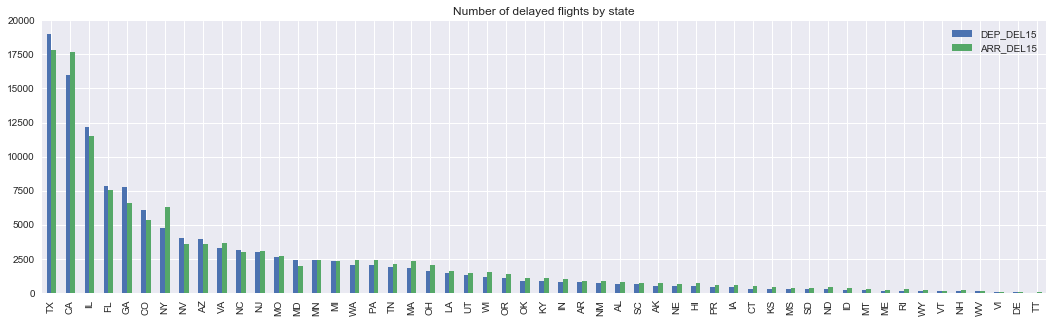

In [17]:
delay_df.sort_values('DEP_DEL15', ascending=False).plot(kind='bar', title='Number of delayed flights by state')

In [20]:
# 以上没有考虑总的航班数量，更好的方式是百分比
pct_departure_delay = departure_delay_counts / data.ORIGIN_STATE_ABR.value_counts()
pct_arrival_delay = arrival_delay_counts / data.DEST_STATE_ABR.value_counts()

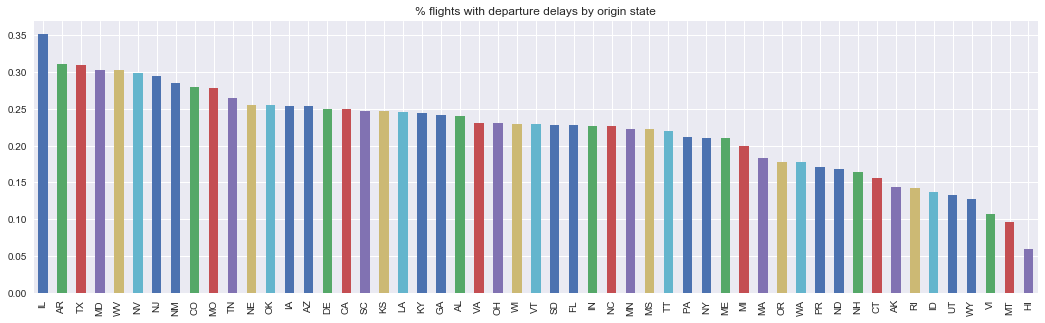

In [21]:
pct_departure_delay.sort_values(ascending=False).plot(kind='bar', title="% flights with departure delays by origin state")

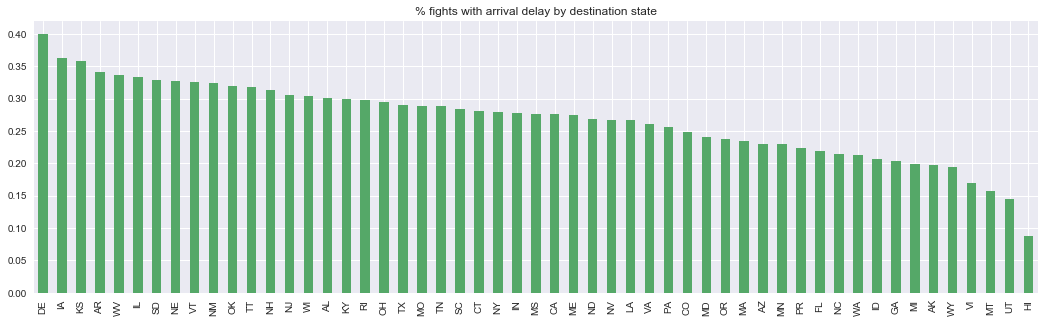

In [22]:
pct_arrival_delay.sort_values(ascending=False).plot(kind='bar', color=colors[1], title="% fights with arrival delay by destination state")

In [24]:
data.columns

Index(['FL_DATE', 'UNIQUE_CARRIER', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN_STATE_ABR',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID',
       'DEST_STATE_ABR', 'DEP_DELAY_NEW', 'DEP_DEL15', 'ARR_DELAY_NEW',
       'ARR_DEL15', 'DISTANCE', 'DISTANCE_GROUP', 'Unnamed: 16'],
      dtype='object')

In [25]:
# 下面实际上通过index重新赋了index的名称
pct_delay_df = pd.DataFrame([pct_departure_delay, pct_arrival_delay], index=['PCT_DEP_DEL15', 'PCT_ARR_DEL15']).T
pct_delay_df

,PCT_DEP_DEL15,PCT_ARR_DEL15
AK,0.143877,0.196708
AL,0.239985,0.300749
AR,0.311243,0.341617
AZ,0.253818,0.230199
CA,0.249492,0.276411
...,...,...
VT,0.228814,0.324841
WA,0.177552,0.213150
WI,0.228970,0.303614
WV,0.302721,0.336735


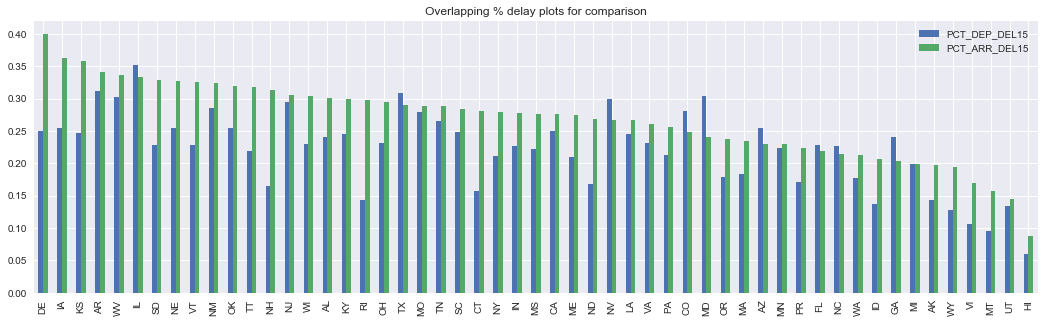

In [26]:
pct_delay_df.sort_values('PCT_ARR_DEL15', ascending=False).plot(kind='bar', title="Overlapping % delay plots for comparison")

从上面可以看出小机场的差距比较大。

## 机场间延迟趋势

In [28]:
delay_counts_df = data[['ORIGIN_STATE_ABR', 'DEST_STATE_ABR', 'ARR_DEL15']].groupby(['ORIGIN_STATE_ABR', 'DEST_STATE_ABR'])

In [30]:
delay_counts_df = delay_counts_df.sum()

In [32]:
delay_counts_df.head()

ARR_DEL15
ORIGIN_STATE_ABR DEST_STATE_ABR           
AK               AK                  351.0
                 AZ                    5.0
                 CA                   11.0
                 CO                   21.0
                 GA                    3.0

In [33]:
support = (delay_counts_df / len(data))
support.head()

ARR_DEL15
ORIGIN_STATE_ABR DEST_STATE_ABR           
AK               AK               0.000698
                 AZ               0.000010
                 CA               0.000022
                 CO               0.000042
                 GA               0.000006

> 通过下面的这种转化，我感觉对于我们需要的处理的数据，需要先进行上面的处理，接着进行下面的转化，最后再继续进行相应的处理。

In [34]:
# 下面进行图形的转换，把行的内容转到列上
support = support.unstack()
support.head()

ARR_DEL15                                   ...       \
DEST_STATE_ABR          AK  AL        AR        AZ        CA ...   VT   
ORIGIN_STATE_ABR                                             ...        
AK                0.000698 NaN       NaN  0.000010  0.000022 ...  NaN   
AL                     NaN NaN       NaN       NaN       NaN ...  NaN   
AR                     NaN NaN       NaN  0.000008  0.000036 ...  NaN   
AZ                0.000026 NaN  0.000008  0.000129  0.002559 ...  NaN   
CA                0.000056 NaN  0.000008  0.001846  0.011353 ...  NaN   

                                               
DEST_STATE_ABR          WA        WI  WV   WY  
ORIGIN_STATE_ABR                               
AK                0.000209       NaN NaN  NaN  
AL                     NaN       NaN NaN  NaN  
AR                     NaN       NaN NaN  NaN  
AZ                0.000290  0.000062 NaN  NaN  
CA                0.001423  0.000068 NaN  0.0  

[5 rows x 53 columns]

上面的support是有2级index的列(mulitilevel index),我们如果想去掉外面的ADD_DEL15可以先转列到行，然后去掉index，之后再转换回去，最终我们就可以得到一个始发-终到机场的延迟比例。

In [35]:
support = support.T.reset_index(level=0, drop=True).T
support.head()

DEST_STATE_ABR,AK,AL,AR,AZ,CA,...,VT,WA,WI,WV,WY
ORIGIN_STATE_ABR,,,,,,,,,,,
AK,0.000698,NaN,NaN,0.000010,0.000022,...,NaN,0.000209,NaN,NaN,NaN
AL,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
AR,NaN,NaN,NaN,0.000008,0.000036,...,NaN,NaN,NaN,NaN,NaN
AZ,0.000026,NaN,0.000008,0.000129,0.002559,...,NaN,0.000290,0.000062,NaN,NaN
CA,0.000056,NaN,0.000008,0.001846,0.011353,...,NaN,0.001423,0.000068,NaN,0.0


In [36]:
def asymmatplot(plotmat, names=None, cmap="Greys", cmap_range=None, ax=None, **kwargs):
    '''
    Plot an asymmetric matrix with colormap and statistic values. A modification of the
    symmatplot() function in Seaborn to show the upper-half of the matrix.
    
    See https://github.com/mwaskom/seaborn/blob/master/seaborn/linearmodels.py for the original.
    '''
    if ax is None:
        ax = plt.gca()

    nvars = len(plotmat)

    if cmap_range is None:
        vmax = np.nanmax(plotmat) * 1.15
        vmin = np.nanmin(plotmat) * 1.15
    elif len(cmap_range) == 2:
        vmin, vmax = cmap_range
    else:
        raise ValueError("cmap_range argument not understood")

    mat_img = ax.matshow(plotmat, cmap=cmap, vmin=vmin, vmax=vmax, **kwargs)

    plt.colorbar(mat_img, shrink=.75)
 
    ax.xaxis.set_ticks_position("bottom")
    ax.set_xticklabels(names, rotation=90)
    ax.set_yticklabels(names)

    minor_ticks = np.linspace(-.5, nvars - 1.5, nvars)
    ax.set_xticks(minor_ticks, True)
    ax.set_yticks(minor_ticks, True)
    major_ticks = np.linspace(0, nvars - 1, nvars)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    ax.grid(False, which="major")
    ax.grid(True, which="minor", linestyle="-")

    return ax

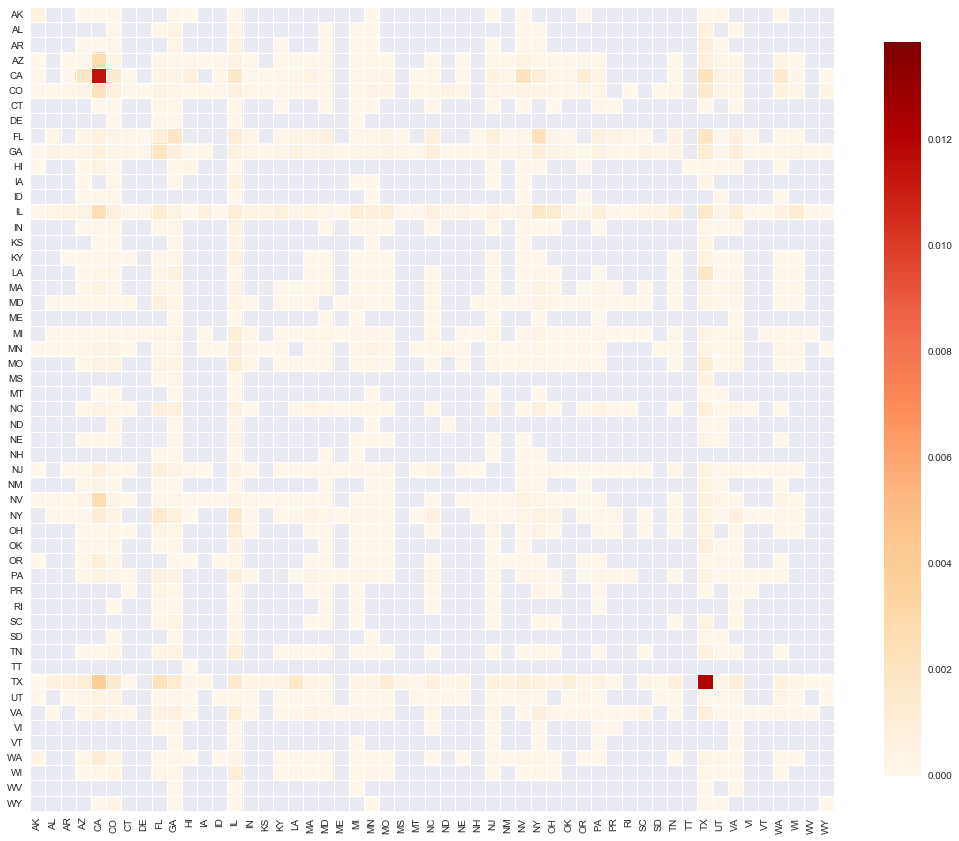

In [38]:
fig, ax = plt.subplots(figsize=(18, 18))
asymmatplot(support, names=support.columns, ax=ax, cmap="OrRd")

右边色条给出了延迟的情况，红色代表严重。<br/>
不过(CA->CA), (TX->TX)似乎延迟有点厉害。<br/>
<br/>
也许延迟和航班数量有关？

In [39]:
trip_counts_df = data[['ORIGIN_STATE_ABR', 'DEST_STATE_ABR', 'FL_DATE']].groupby(['ORIGIN_STATE_ABR','DEST_STATE_ABR']).count()

In [40]:
delay_counts_df = delay_counts_df.rename_axis({'ARR_DEL15': 'COUNTS'}, axis=1)
trip_counts_df = trip_counts_df.rename_axis({'FL_DATE': 'COUNTS'}, axis=1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  


用延迟航班数量除以总航班数

In [41]:
mat = (delay_counts_df / trip_counts_df).unstack().T.reset_index(level=0, drop=True).T

这时我们发现一些与前面不同的信息

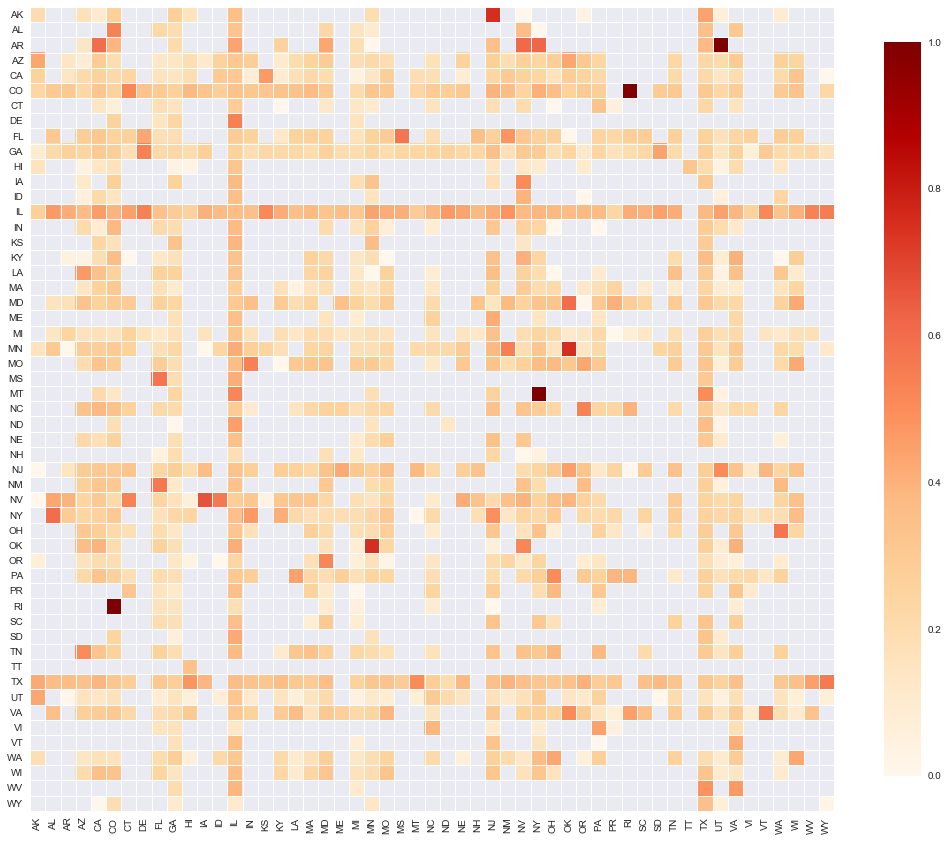

In [42]:
fig, ax = plt.subplots(figsize=(18, 18))
asymmatplot(mat, names=mat.columns, ax=ax, cmap='OrRd', cmap_range=(0., 1.0))

## 每日延迟分布情况

每天到达延迟分布情况如何？

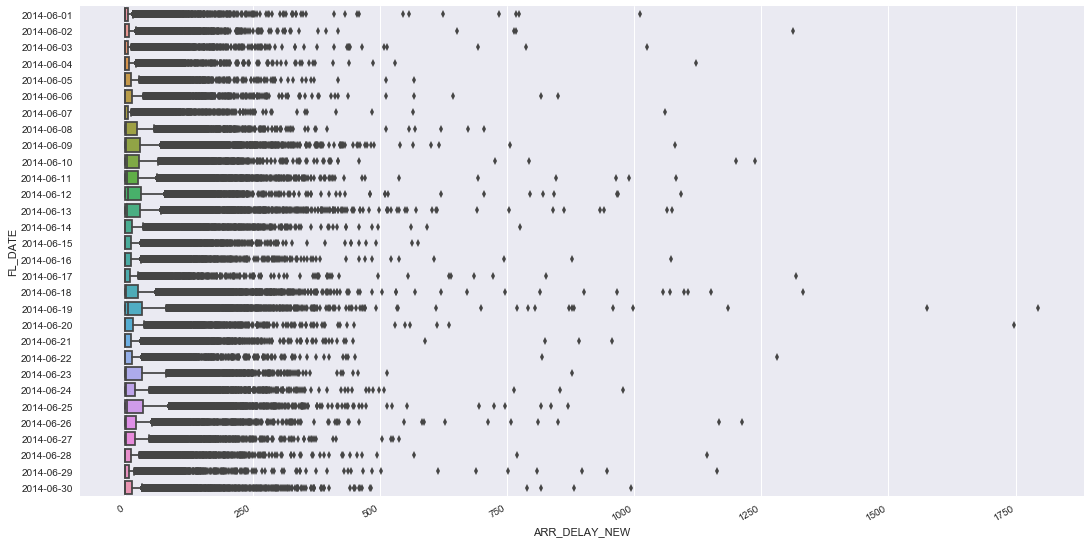

In [47]:
fig, ax = plt.subplots(figsize=(18, 10))
sns.boxplot(data.ARR_DELAY_NEW, data.FL_DATE, ax=ax)
fig.autofmt_xdate()        # 对X轴的日期进行了格式化

大量的outlier,有的延迟达到12小时以上

In [48]:
sns.boxplot?

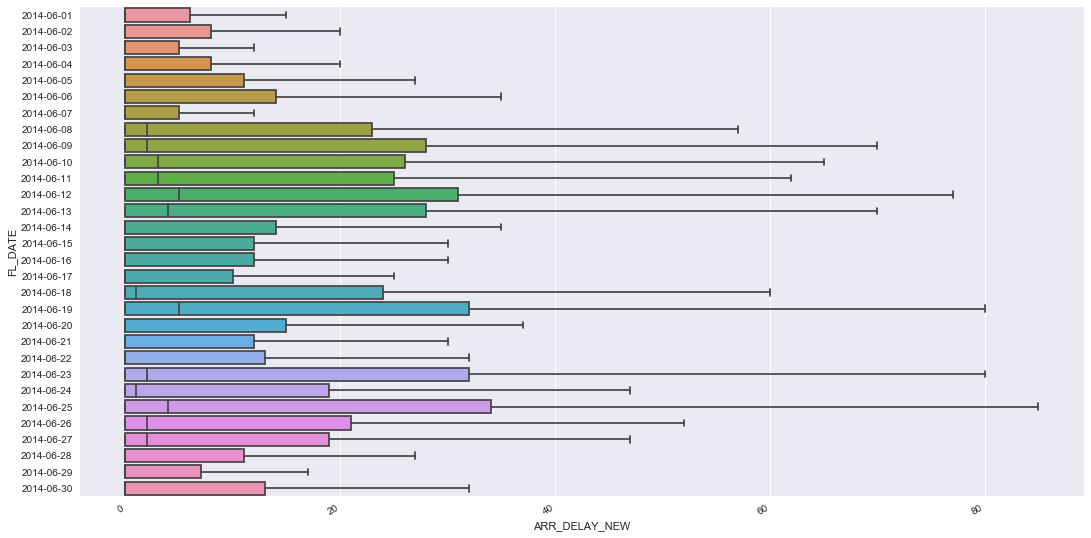

In [49]:
# 图中间的黑线就代表着均值
fig, ax = plt.subplots(figsize=(18, 10))
sns.boxplot(data.ARR_DELAY_NEW, data.FL_DATE, ax=ax, showfliers=False)    # showflier参数赋值为False的时候，就不画这些outlier出来
fig.autofmt_xdate()

大部分情况median arrival delay是 准时到达！

更多的分析方向：
1. 建立一个模型来分析航班延迟；
2. 与天气结合；
3. 不同的航运公司航班准点情况。